Import Libraries

In [105]:
try:
    import joblib
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from scipy import stats
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.datasets import make_regression, make_swiss_roll
    from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
    from sklearn.linear_model import LinearRegression, LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    from sklearn.svm import SVC, SVR
    from sklearn.tree import DecisionTreeClassifier

    print('All libraries imported successfully!')
except ImportError:
    print('Some libraries failed to import.')

All libraries imported successfully!


Load the Data

In [106]:
# Load data from a CSV file
df = pd.read_csv('tedsd_puf_2019.csv')
print('tedsd_puf_2019.csv loaded')
df.head()

tedsd_puf_2019.csv loaded


,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


#### Data Exploration

In [107]:
# Summarize the data
display(df.shape)
display(df.describe())
display(df.info())

(1722503, 76)

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
count,1722503.0,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,...,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06
mean,2019.0,2.019087e+10,2.558714e+01,1.817492e+04,1.777766e+00,-5.340136e-01,5.540790e+00,-6.617934e+00,2.018519e+01,2.483211e+00,...,3.146584e-04,1.067052e-03,4.600863e-03,1.085629e-03,1.239475e-03,3.434421e-02,4.596869e+00,2.420380e+00,-4.622192e-01,1.945627e+00
std,0.0,5.065654e+05,1.427222e+01,1.728295e+04,3.731331e+00,4.470499e+00,1.938862e+00,5.031978e+00,1.433813e+01,4.037795e+00,...,1.773583e-02,3.264834e-02,6.767346e-02,3.293101e-02,3.518437e-02,1.821118e-01,2.560715e+00,1.144867e+00,2.492082e+00,8.534534e-01
min,2019.0,2.019000e+10,1.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,1.000000e+00,-9.000000e+00,1.000000e+00,-9.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+00,0.000000e+00
25%,2019.0,2.019044e+10,1.200000e+01,-9.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,-9.000000e+00,4.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00
50%,2019.0,2.019087e+10,2.700000e+01,1.674000e+04,3.000000e+00,1.000000e+00,7.000000e+00,-9.000000e+00,2.600000e+01,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00
75%,2019.0,2.019131e+10,3.600000e+01,3.562000e+04,3.000000e+00,2.000000e+00,7.000000e+00,-9.000000e+00,3.400000e+01,6.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00
max,2019.0,2.019176e+10,7.200000e+01,4.970000e+04,5.000000e+00,4.000000e+00,8.000000e+00,8.000000e+00,3.700000e+01,7.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722503 entries, 0 to 1722502
Data columns (total 76 columns):
 #   Column                 Dtype
---  ------                 -----
 0   DISYR                  int64
 1   CASEID                 int64
 2   STFIPS                 int64
 3   CBSA2010               int64
 4   EDUC                   int64
 5   MARSTAT                int64
 6   SERVICES               int64
 7   DETCRIM                int64
 8   LOS                    int64
 9   PSOURCE                int64
 10  NOPRIOR                int64
 11  ARRESTS                int64
 12  EMPLOY                 int64
 13  METHUSE                int64
 14  PSYPROB                int64
 15  PREG                   int64
 16  GENDER                 int64
 17  VET                    int64
 18  LIVARAG                int64
 19  DAYWAIT                int64
 20  SERVICES_D             int64
 21  REASON                 int64
 22  EMPLOY_D               int64
 23  LIVARAG_D              int64
 24

None

Data Cleaning

In [108]:
# Create a copy of the data
df1 = df.copy()
print('Copy of the DataFrame')
display(df1.head())

Copy of the DataFrame


,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [109]:
# In this dataset, -9 is used to represent missing values. Which columns have -9 as a value and how many?
missing_values = df1.isin([-9]).sum()
display(missing_values)

DISYR            0
CASEID           0
STFIPS           0
CBSA2010    704011
EDUC        174935
             ...  
OTHERFLG         0
DIVISION         0
REGION           0
IDU         131797
ALCDRUG          0
Length: 76, dtype: int64

In [110]:
# What specific columns have -9 as a value?
missing_columns = missing_values[missing_values > 0]
display(missing_columns)

CBSA2010                  704011
EDUC                      174935
MARSTAT                   360937
DETCRIM                  1397909
PSOURCE                   120477
NOPRIOR                   136613
ARRESTS                   182116
EMPLOY                    152365
METHUSE                   178805
PSYPROB                   225375
PREG                     1136767
GENDER                       756
VET                       174003
LIVARAG                   174307
DAYWAIT                   920756
EMPLOY_D                  322858
LIVARAG_D                 354754
ARRESTS_D                 340163
DSMCRIT                   410311
RACE                       58924
ETHNIC                     60872
DETNLF                   1251911
DETNLF_D                 1332282
PRIMINC                   680082
SUB1                       99426
SUB2                       62316
SUB3                      185870
SUB1_D                    217220
SUB2_D                    123173
SUB3_D                     82543
ROUTE1    

In [111]:
# How many columns have -9 as a value?
display(len(missing_columns))

47

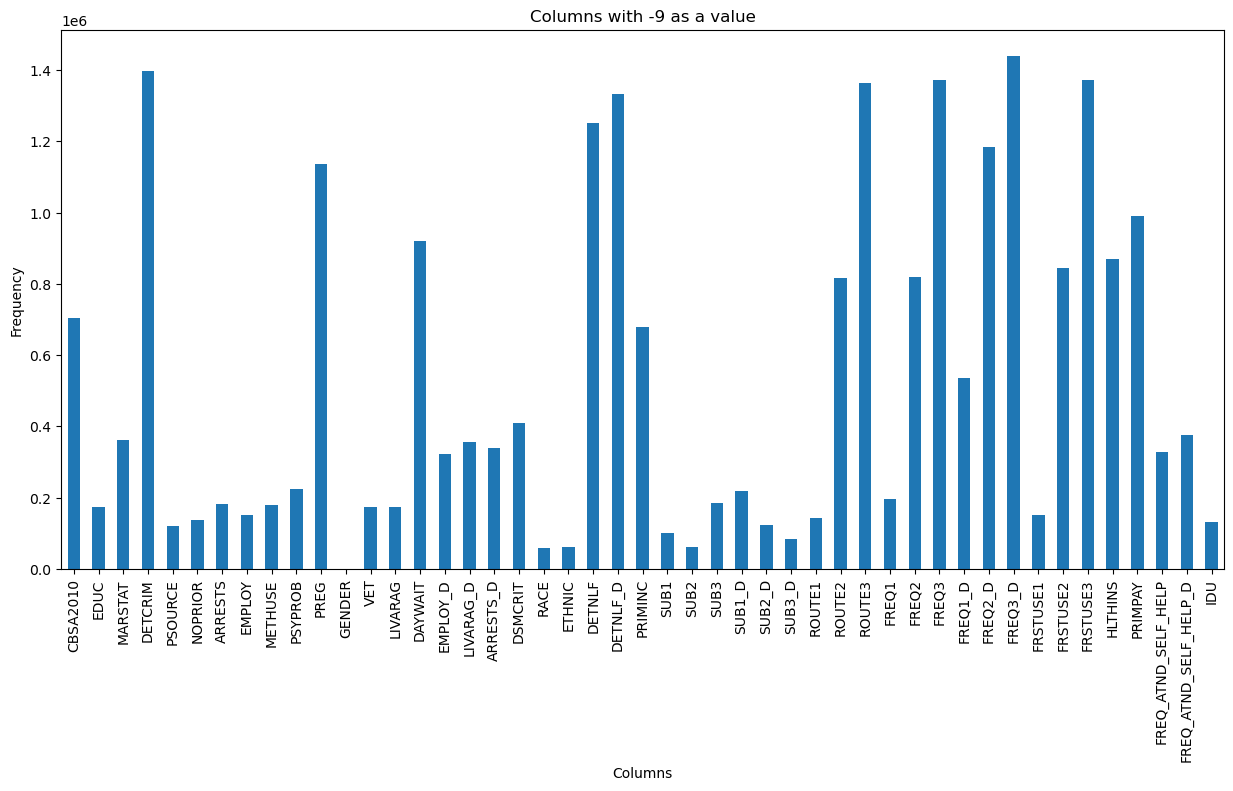

In [112]:
# Visualize all columns with -9 as a value
missing_columns.plot(kind='bar', figsize=(15, 7))
plt.title('Columns with -9 as a value')
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.show()

In [113]:
# Replace -9 with NaN
# df1 = df1.replace(-9, np.nan)
# print('Replacing -9 with NaN. A -9 represents a missing value code in the dataset.')
# display(df1.head())

In [114]:
# Find columns that contain NaN values
# columns_with_nan = df1.isna().any()

# # Count the number of columns that contain NaN values
# num_columns_with_nan = columns_with_nan.sum()

# # Print the number of columns that contain NaN values
# print('There are',num_columns_with_nan,'columns that contain NaN.')

In [115]:
# Find columns that contain NaN values
# columns_with_nan = df1.columns[df1.isna().any()].tolist()

# # Calculate the percentage of NaN values in each of these columns
# nan_percentage = df1[columns_with_nan].isna().mean() * 100

# # Sort the percentages in ascending order
# nan_percentage_sorted = nan_percentage.sort_values(ascending=False)

# # Print the percentage of NaN values
# print('Percentage of NaN values in each column.')
# display(nan_percentage_sorted)

In [116]:
# Create a bar plot
# plt.figure(figsize=(20,18))
# sns.barplot(x=nan_percentage_sorted.values, y=nan_percentage_sorted.index)
# plt.title('Percentage of NaN values in columns')
# # Show the plot
# print('Bar plot showing the percentage of NaN values in columns.')
# plt.show()

In [117]:
# reason = df1['REASON']
# df1_corr = df1.corr()
# df1_corr.unstack().sort_values()
# variable = df1_corr['REASON'].sort_values()
# print('Correlation of REASON with other variables.')
# variable.tail()

In [118]:
# Create a list of colors based on the values in 'variable'
# colors = ['red' if x < 0 else 'blue' for x in variable[:-1]]

# # Visualize correlation to the target variable 'REASON'
# plt.figure(figsize=(20,18))
# variable[:-1].plot(kind='bar', color=colors)
# plt.title('Correlation to the target variable')
# print('Visualizing the positive and negative correlations of REASON with other variables.')
# plt.show()

In [119]:
# Filter to include only positive correlations
# positive_correlations = variable[variable > 0]

# # Visualize positive correlations
# plt.figure(figsize=(20,18))
# positive_correlations[:-1].plot(kind='bar', color='blue')
# plt.title('This is a visualization of only the positive correlations to the target variable')
# print('Positive correlations of REASON with other variables.')
# print("\nSERVICES is the highest positive correlation and EMPLOY is the lowest positive correlation at the moment.")
# print("\nMore exploration is needed to understand the relationship between the target variable and the features.")
# plt.show()

In [120]:
# print('These are the columns with NaN values, with the highest percentage of NaN values at the top.')
# print("\nFor example, the column FREQ3_D has roughly 83.66 precent of its values as NaN.")
# print('\nThis means that 83.66 percent of the values in the column FREQ3_D are missing or not reported.')
# display(nan_percentage_sorted)
# display(df1_corr)

In [121]:
# Define the column names from the first set
# first_set = [
#     "FREQ3_D", "DETCRIM", "FREQ3", "FRSTUSE3", "ROUTE3", "DETNLF_D", "DETNLF",
#     "FREQ2_D", "PREG", "PRIMPAY", "DAYWAIT", "HLTHINS", "FRSTUSE2", "FREQ2",
#     "ROUTE2", "CBSA2010", "PRIMINC", "FREQ1_D", "DSMCRIT", "FREQ_ATND_SELF_HELP_D",
#     "MARSTAT", "LIVARAG_D", "ARRESTS_D", "FREQ_ATND_SELF_HELP", "EMPLOY_D", "PSYPROB",
#     "SUB1_D", "FREQ1", "SUB3", "ARRESTS", "METHUSE", "EDUC", "LIVARAG", "VET", "EMPLOY",
#     "FRSTUSE1", "ROUTE1", "NOPRIOR", "IDU", "SUB2_D", "PSOURCE", "SUB1", "SUB3_D",
#     "SUB2", "ETHNIC", "RACE", "GENDER"
# ]

# Define the column names from the second set
# second_set = [
#     "DISYR", "CASEID", "STFIPS", "CBSA2010", "EDUC", "MARSTAT", "SERVICES",
#     "DETCRIM", "LOS", "PSOURCE", "TRNQFLG", "BARBFLG", "SEDHPFLG", "INHFLG",
#     "OTCFLG", "OTHERFLG", "DIVISION", "REGION", "IDU", "ALCDRUG"
# ]

# Find the common column names
# common_columns = list(set(first_set).intersection(second_set))

# # Add quotations around each column name
# first_set_quoted = [f'"{col}"' for col in first_set]
# second_set_quoted = [f'"{col}"' for col in second_set]
# common_columns_quoted = [f'"{col}"' for col in common_columns]

# # Print the results
# print("Looking for common columns in two sets of column names to see if they need be removed or filled.")
# print("\nColumn Names from the First Set:(nan_percentage_sorted)")
# print(", ".join(first_set_quoted))
# print("\nColumn Names from the Second Set:(df1_corr)")
# print(", ".join(second_set_quoted))
# print("\nCommon Column Names: (To consider for removal/fill)")
# print(", ".join(common_columns_quoted))

# plt.figure(figsize=(20,18))
# plt.barh(first_set, [1]*len(first_set), color='blue', label='First Set')
# plt.barh(second_set, [1]*len(second_set), color='red', label='Second Set')
# plt.barh(common_columns, [1]*len(common_columns), color='yellow', label='Common Columns')
# plt.xlabel('Count')
# plt.title('Column Names')
# plt.legend()
# plt.show()

# Find the Nan percentages in the common columns
# nan_percentages_common = df1[common_columns].isna().mean() * 100

# Sort and display the result
# nan_percentages_common_sorted = nan_percentages_common.sort_values(ascending=False)
# display(nan_percentages_common_sorted)

#### Data Cleaning

In [122]:
# In column FRSTUSE1 replace -9 with 0? Confirm with value counts.
df1['FRSTUSE1'] = df1['FRSTUSE1'].replace(-9, 0)
print(df1['FRSTUSE1'].value_counts())

FRSTUSE1
3    383118
4    286597
2    282460
5    191686
7    189684
0    150579
6    143891
1     94488
Name: count, dtype: int64


In [123]:
# In column FRSTUSE2 replace -9 with 0? Confirm with value counts.
df1['FRSTUSE2'] = df1['FRSTUSE2'].replace(-9, 0)
print(df1['FRSTUSE2'].value_counts())

FRSTUSE2
0    844104
3    222974
2    170892
4    153705
7    103384
5     95617
6     78339
1     53488
Name: count, dtype: int64


In [124]:
# In column FRSTUSE3 replace -9 with 0? Confirm with value counts.
df1['FRSTUSE3'] = df1['FRSTUSE3'].replace(-9, 0)
print(df1['FRSTUSE3'].value_counts())

FRSTUSE3
0    1371909
3      92397
2      78630
4      57055
7      37209
5      32205
6      27655
1      25443
Name: count, dtype: int64


In [125]:
# In column SUB2 replace -9 with 19? Confirm with value counts.
df1['SUB2'] = df1['SUB2'].replace(-9, 19)
print(df1['SUB2'].value_counts())

SUB2
1     750100
4     231573
3     187237
2     150904
10    108974
19     87499
5      64161
7      64062
13     49362
11      9428
12      4256
16      3651
9       3202
8       2851
6       2808
18       882
17       667
15       582
14       304
Name: count, dtype: int64


In [126]:
# In column SUB2_D replace -9 with 19? Confirm with value counts.
df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
print(df1['SUB2_D'].value_counts())

SUB2_D
1     813505
4     210739
3     156567
19    147315
2     129235
10     89820
7      56850
5      54200
13     39421
11      8690
12      3626
16      3419
9       2753
6       2219
8       2067
18       719
17       617
15       496
14       245
Name: count, dtype: int64


In [127]:
# In column SUB3 replace -9 with 19? Confirm with value counts.
df1['SUB3'] = df1['SUB3'].replace(-9, 19)
print(df1['SUB3'].value_counts())

SUB3
1     1181959
19     208079
4       96270
2       59889
3       57346
13      29996
10      26240
7       24731
5       17234
11       6402
9        3775
12       3767
16       2193
8        1600
6        1439
18        663
17        456
15        348
14        116
Name: count, dtype: int64


In [128]:
# In column SUB3_D replace -9 with 0? Confirm with value counts.
df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
print(df1['SUB3_D'].value_counts())

SUB3_D
1     1316613
4       86433
0       82543
2       55708
3       47780
10      29027
13      25784
7       22480
19      22280
5       15445
11       5947
9        3451
12       2809
16       2326
8        1341
6        1030
18        602
17        433
15        333
14        138
Name: count, dtype: int64


In [129]:
# In column ROUTE3 replace -9 with 0? Confirm with value counts.
df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 0)
print(df1['ROUTE3'].value_counts())

ROUTE3
0    1362519
2     154215
1     122303
3      48044
4      31983
5       3439
Name: count, dtype: int64


In [130]:
# In column DSMCRIT replace -9 with 0? Confirm with value counts.
df1['DSMCRIT'] = df1['DSMCRIT'].replace(-9, 0)
print(df1['DSMCRIT'].value_counts())

DSMCRIT
0     410311
5     380512
4     289535
8     143441
19    125445
7      82105
6      56213
9      52972
2      40101
10     39565
3      29130
11     23297
12     17972
1      12628
13      7786
15      5239
17      2246
14      2181
16      1490
18       334
Name: count, dtype: int64


In [131]:
# In column PSYPROB replace -9 with 0? Confirm with value counts.
df1['PSYPROB'] = df1['PSYPROB'].replace(-9, 0)
print(df1['PSYPROB'].value_counts())

PSYPROB
2    823223
1    673905
0    225375
Name: count, dtype: int64


In [132]:
# In column PRIMPAY replace -9 with 0? Confirm with value counts.
df1['PRIMPAY'] = df1['PRIMPAY'].replace(-9, 0)
print(df1['PRIMPAY'].value_counts())

PRIMPAY
0    989974
4    389616
5    162022
7     49127
1     48470
2     44071
6     20758
3     18465
Name: count, dtype: int64


In [133]:
# In column FREQ_ATND_SELF_HELP replace -9 with 0? Confirm with value counts.
df1['FREQ_ATND_SELF_HELP'] = df1['FREQ_ATND_SELF_HELP'].replace(-9, 0)
print(df1['FREQ_ATND_SELF_HELP'].value_counts())

FREQ_ATND_SELF_HELP
1    1037604
0     327054
4     126267
2     104522
5      65074
3      61982
Name: count, dtype: int64


In [134]:
# In column FREQ_ATND_SELF_HELP_D replace -9 with 0? Confirm with value counts.
df1['FREQ_ATND_SELF_HELP_D'] = df1['FREQ_ATND_SELF_HELP_D'].replace(-9, 0)
print(df1['FREQ_ATND_SELF_HELP_D'].value_counts())

FREQ_ATND_SELF_HELP_D
1    859331
0    376995
4    186509
2    115895
5    107791
3     75982
Name: count, dtype: int64


#### Columns that need clarification:
* ROUTE2: Route of administration (secondary)
* IDU: Current IV drug use reported at admission
* HLTHINS: Health insurance


These are the 'Drug use reported at admission' columns. Not reported = 0, and reported = 1. The percentage for each column is fairly high. I believe that these columns are important for the model.

* ALCFLG: Alcohol reported at admission
* COKEFLG: Cocaine/crack reported at admission
* MARFLG: Marijuana/hashish reported at admission
* HERFLG: Heroin reported at admission
* METHFLG: Non-rx methadone reported at admission
* OPSYNFLG: Other opiates/synthetics reported at admission
* PCPFLG: PCP reported at admission
* HALLFLG: Hallucinogens reported at admission
* MTHAMFLG: Methamphetamine/speed reported at admission
* AMPHFLG: Other amphetamines reported at admission
* STIMFLG: Other stimulants reported at admission
* BENZFLG: Benzodiazepines reported at admission
* TRNQFLG: Other tranquilizers reported at admission
* BARBFLG: Barbiturates reported at admission
* SEDHPFLG: Other sedatives/hypnotics reported at admission
* INHFLG: Inhalants reported at admission
* OTCFLG: Over-the-counter medication reported at admission
* OTHERFLG: Other drug reported at admission

#### Data Preprocessing

In [135]:
# What are the correlations of all columns to the target variable 'REASON'?
df1_corr = df1.corr()
variable = df1_corr['REASON'].sort_values()
print('Correlation of REASON with other variables.')
display(variable)

Correlation of REASON with other variables.


HLTHINS   -0.106469
PRIMINC   -0.098816
LOS       -0.084553
ALCFLG    -0.078218
AGE       -0.051736
             ...   
ARRESTS    0.209631
FREQ1_D    0.214312
SUB1_D     0.243122
REASON     1.000000
DISYR           NaN
Name: REASON, Length: 76, dtype: float64

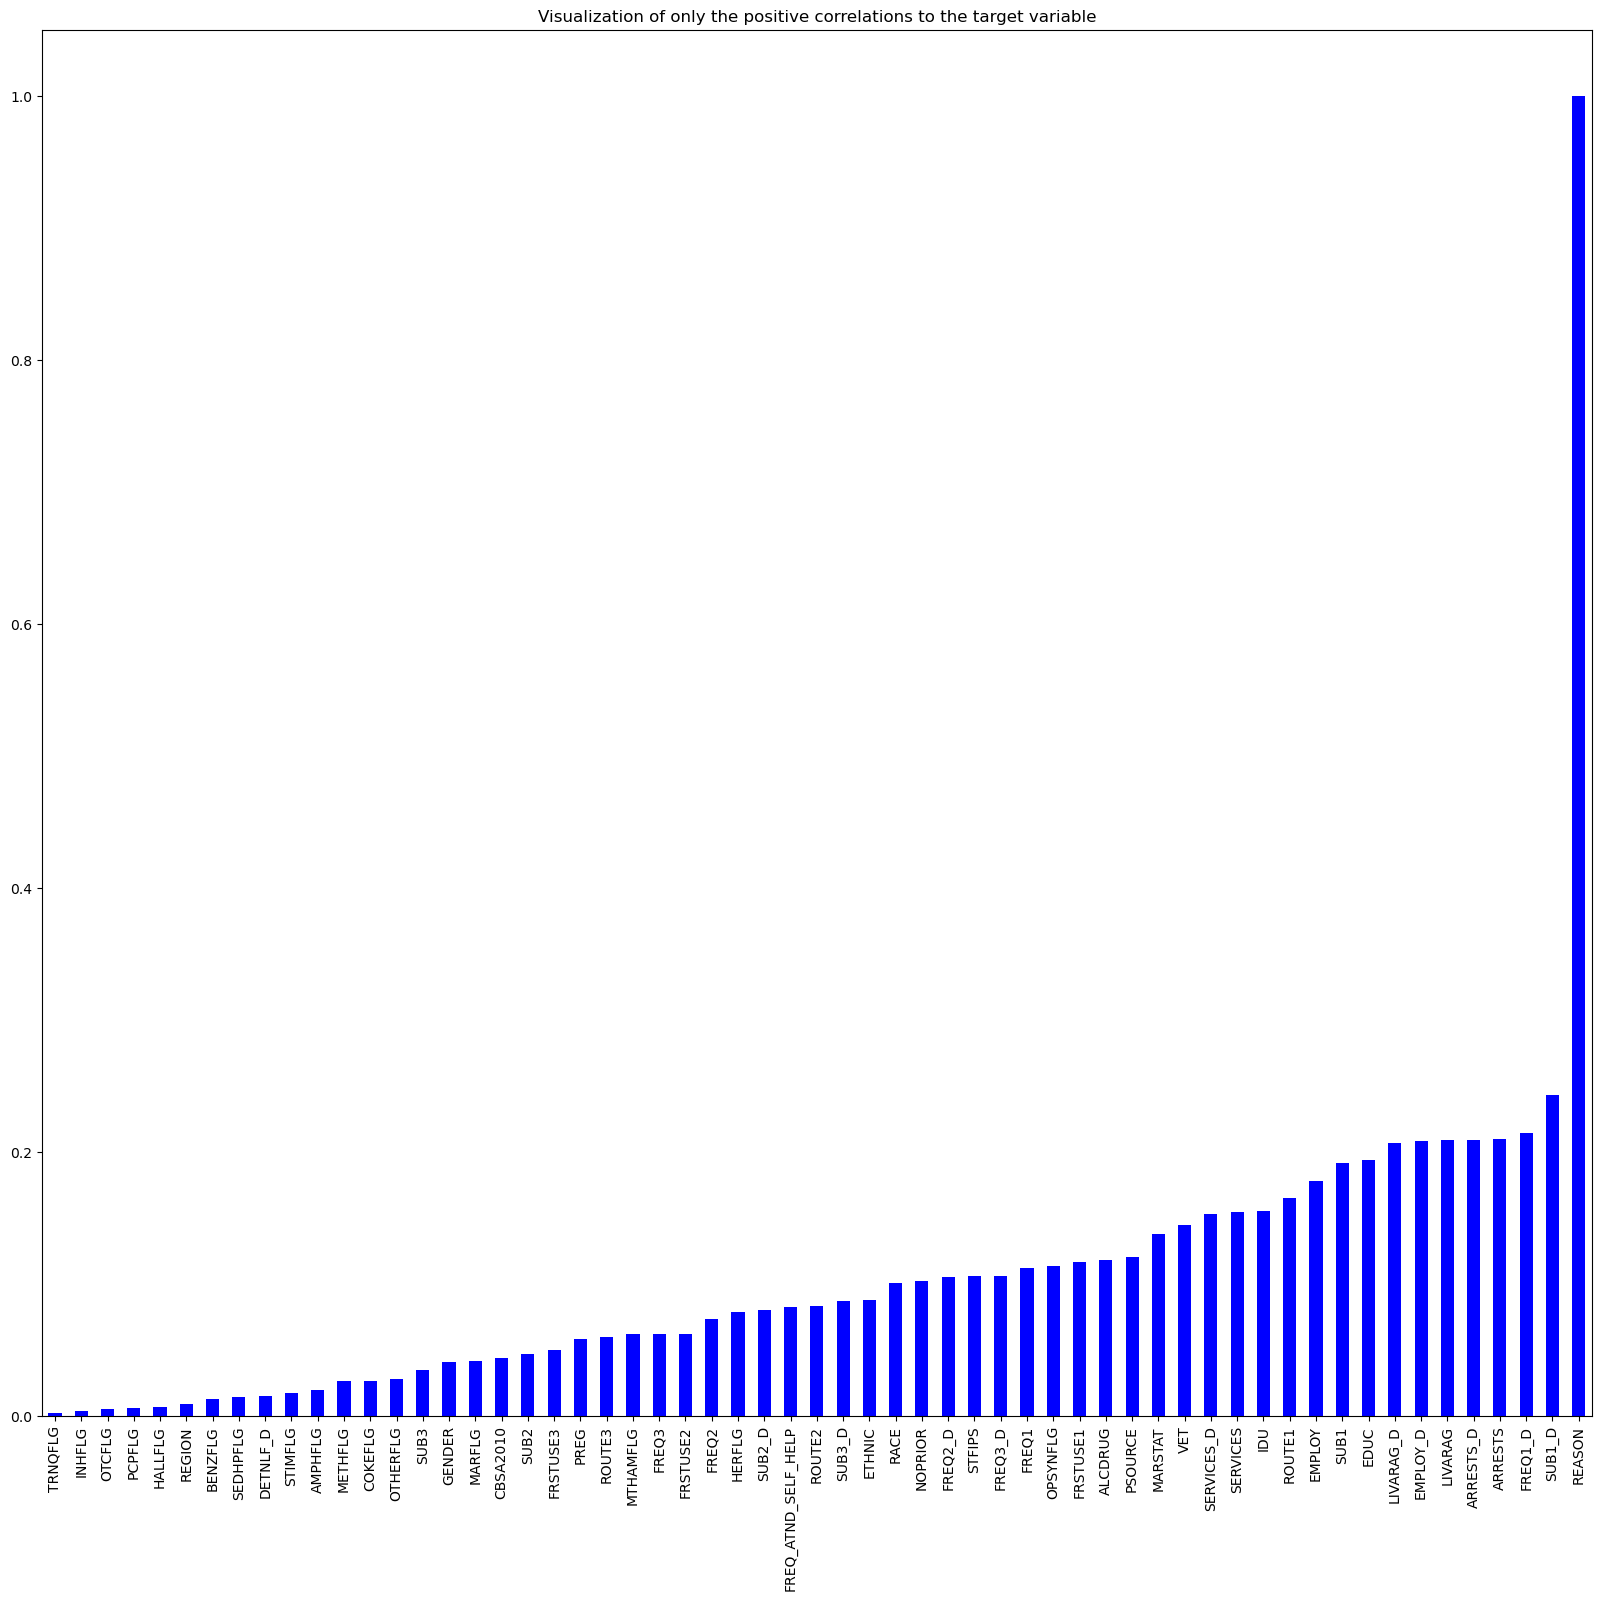

In [136]:
# Visualize only the positive correlations
positive_correlations = variable[variable > 0]
plt.figure(figsize=(20,18))
positive_correlations.plot(kind='bar', color='blue')
plt.title('Visualization of only the positive correlations to the target variable')
plt.show()

In [137]:
# Display LOS
los = df1['LOS']
display(los)

0          37
1          35
2          35
3          37
4          37
           ..
1722498    33
1722499    13
1722500    33
1722501    14
1722502    13
Name: LOS, Length: 1722503, dtype: int64

In [145]:
# In LOS (Length of Stay) column, replace the values with the following:
# if days is between 1 and 30, return 1
# if days is between 31 and 45, return 2
# if days is between 46 and 60, return 3
# if days is between 61 and 90, return 4
# if days is between 91 and 120, return 5
# if days is between 121 and 180, return 6
# if days is between 181 and 365, return 7
# if days is greater than 365, return 8
# if days is any other value, return None



def los_to_category(days):
    if 1 <= days <= 30: 
        return 1    
    elif 31 <= days <= 45: 
        return 2    
    elif 46 <= days <= 60: 
        return 3    
    elif 61 <= days <= 90: 
        return 4    
    elif 91 <= days <= 120: 
        return 5    
    elif 121 <= days <= 180: 
        return 6    
    elif 181 <= days <= 365: 
        return 7    
    elif days > 365: 
        return 8  
    else:   
        return None  

# Test cases
print(los_to_category(15))  # Expected output: 1
print(los_to_category(35))  # Expected output: 2
print(los_to_category(50))  # Expected output: 3
print(los_to_category(70))  # Expected output: 4
print(los_to_category(100))  # Expected output: 5
print(los_to_category(150))  # Expected output: 6
print(los_to_category(200))  # Expected output: 7
print(los_to_category(400))  # Expected output: 8
print(los_to_category(-5))  # Expected output: None

1
2
3
4
5
6
7
8
None


In [148]:
# Check for missing values in the LOS column
missing_values_los = los.isna().sum()
print('Missing values in the LOS column:', missing_values_los)

Missing values in the LOS column: 0


In [149]:
# Check for -9 in the LOS column
missing_values_los = los.isin([-9]).sum()
print('Missing values in the LOS column:', missing_values_los)

Missing values in the LOS column: 0
